Universidade Nove de Julho
Data Science
Uma Análise Preditiva para Locação de Imóveis no Brasil
Junho/2020

Diego Oliva
Eduardo Stefani
Jorge Alonso

In [2]:
# Importação das Bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Algoritmos de classificação

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [65]:
# Leitura da base de imóveis (hospedada no GitHub)

link ='Uni9-br-renting-dataset.csv'

#df = pd.read_csv('https://stefanieduardo.github.io/uni9/datascience/Uni9-br-renting-dataset.csv',sep=';')

df = pd.read_csv('Uni9-br-renting-dataset.csv',sep=';')

In [66]:
# Exploração inicial da DataSet
# Primeiros cinco itens

df.head()

,id,cidade,area,quartos,banheiro,vagas,andar,animal,mobiliado,condominio,aluguel,taxas,seguro,total,alugado,relacao
0,1,1,22,1,1,0,0,1,0,30,450,13,6,499,1,126
1,2,4,30,1,1,1,3,1,0,0,500,0,7,507,1,140
2,3,4,30,1,1,1,3,1,0,0,500,0,7,507,1,140
3,4,5,35,1,1,0,0,0,0,0,500,0,8,508,1,140
4,5,3,30,1,1,0,0,0,0,0,500,0,9,509,1,140


In [67]:
# Exploração inicial da DataSet
# Últimos cinco itens

df.tail()

,id,cidade,area,quartos,banheiro,vagas,andar,animal,mobiliado,condominio,aluguel,taxas,seguro,total,alugado,relacao
10659,10675,5,884,5,7,6,8,1,0,9000,12750,5917,162,27830,0,3570
10660,10676,5,620,4,6,4,1,1,0,8133,15000,4520,191,27840,0,4200
10661,10677,5,620,4,5,5,8,1,0,7963,15000,5160,191,28310,0,4200
10662,10678,5,530,5,6,4,2,1,1,8300,15000,5000,191,28490,1,4200
10663,10679,5,560,4,4,7,2,1,0,8600,15000,5000,191,28790,1,4200


In [68]:
# Descrição Completa do DataSet

df.describe()

,id,cidade,area,quartos,banheiro,vagas,andar,animal,mobiliado,condominio,aluguel,taxas,seguro,total,alugado,relacao
count,10664.000000,10664.000000,10664.000000,10664.000000,10664.000000,10664.000000,10664.000000,10664.000000,10664.000000,10664.000000,10664.000000,10664.000000,10664.000000,10664.000000,10664.000000,10664.000000
mean,5332.606339,3.925356,148.558140,2.503376,2.231714,1.603995,5.071455,0.777944,0.243811,908.498781,3869.383440,327.595836,52.922074,5158.590304,0.548950,1083.421605
std,3078.756780,1.426711,537.399122,1.168528,1.402575,1.582893,6.072691,0.415648,0.429400,1093.775377,3332.916126,562.904125,46.637598,4382.305265,0.497621,933.219594
min,1.000000,1.000000,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,450.000000,0.000000,3.000000,499.000000,0.000000,126.000000
25%,2666.750000,3.000000,56.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,170.000000,1524.500000,38.000000,21.000000,2057.750000,0.000000,426.750000
50%,5332.500000,5.000000,90.000000,2.000000,2.000000,1.000000,3.000000,1.000000,0.000000,557.000000,2650.000000,125.000000,36.000000,3566.000000,1.000000,742.000000
75%,7998.250000,5.000000,180.000000,3.000000,3.000000,2.000000,8.000000,1.000000,0.000000,1226.250000,5000.000000,375.000000,68.000000,6715.000000,1.000000,1400.000000
max,10679.000000,5.000000,46335.000000,13.000000,10.000000,12.000000,301.000000,1.000000,1.000000,9900.000000,15000.000000,9500.000000,267.000000,28790.000000,1.000000,4200.000000


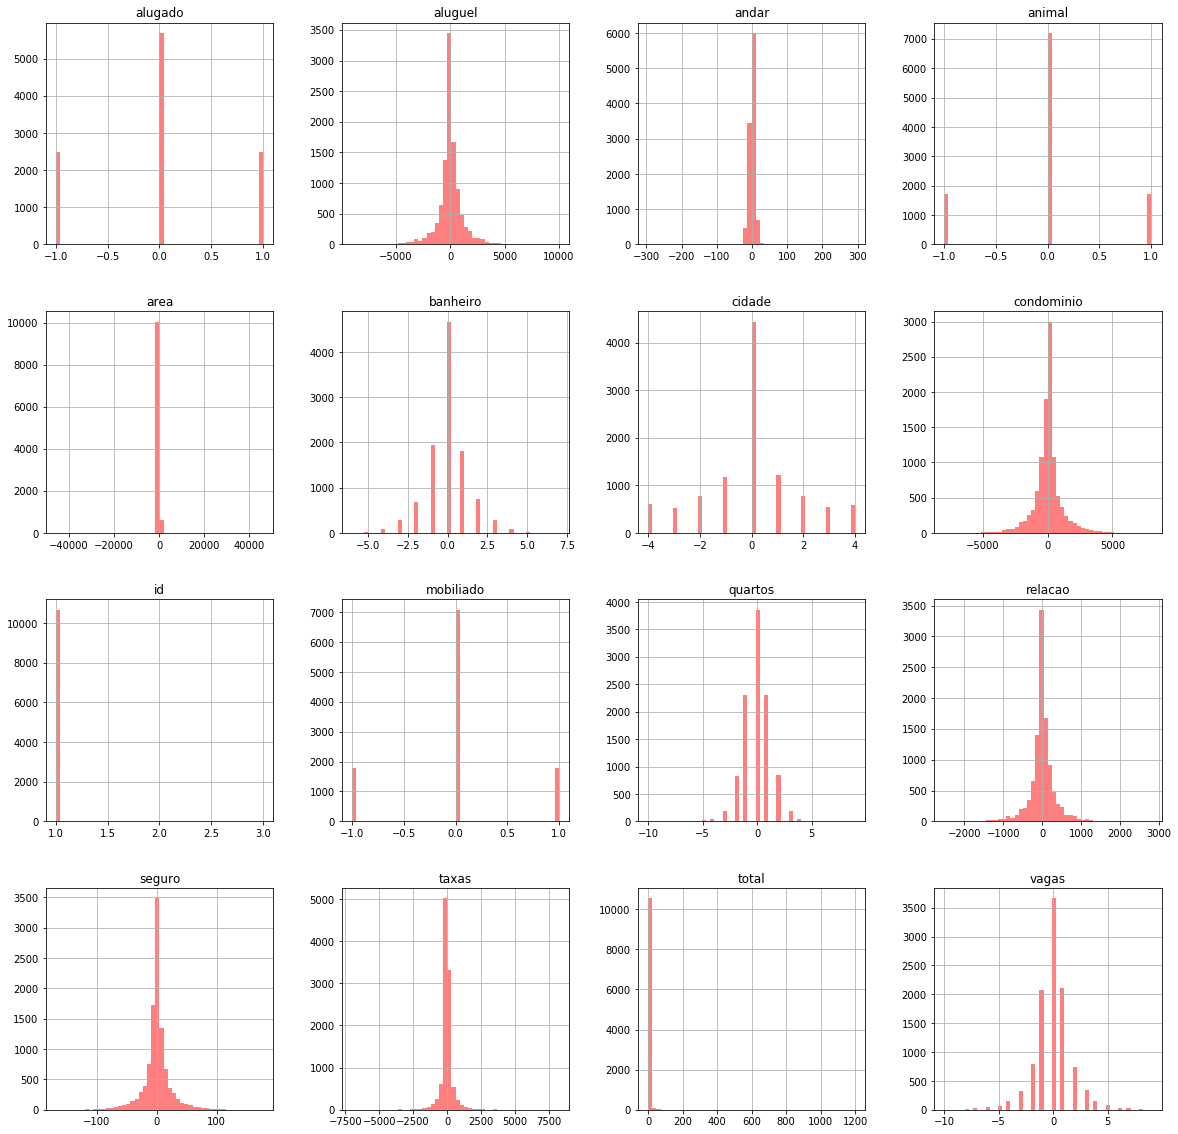

In [69]:
# Histograma de todas a variáveis

df.diff().hist(color='r', alpha=0.5, bins=50,figsize=(20,20));

#df[["A","B","C"]].boxplot()

#df[["aluguel","andar","area","banheiro","cidade","condominio","quartos","seguro","taxas","total","vagas"]].boxplot()

Text(0, 0.5, 'Frequência')

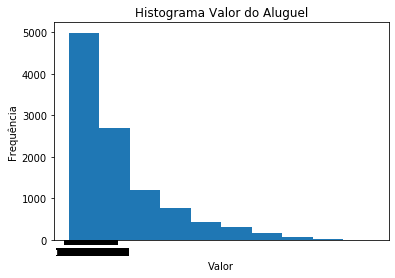

In [70]:
# Histograma do Valor do Aluguel

df.total.plot.hist()

plt.title('Histograma Valor do Aluguel')
plt.xticks([500,1000,1500,2000,2500,3000,3500,4000,4500,5000])
plt.xticks(range(1,5000))
plt.xlabel('Valor')
plt.ylabel('Frequência')

Text(0, 0.5, 'Frequência')

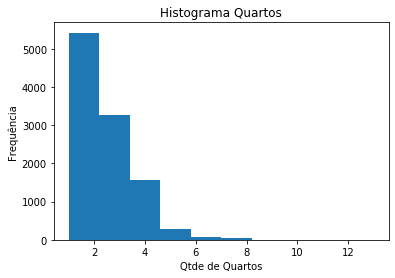

In [71]:
df.quartos.plot.hist()
plt.title('Histograma Quartos')
plt.xlabel('Qtde de Quartos')
plt.ylabel('Frequência')

Text(0.5, 1.0, 'Gráfico de VALOR do Aluguel')

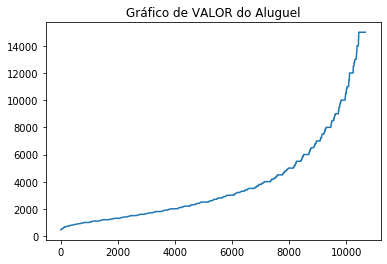

In [72]:
# Gráfico de linha do "Valor do Aluguel"

df.aluguel.sort_values().reset_index(drop=True).plot()
plt.title('Gráfico de VALOR do Aluguel')

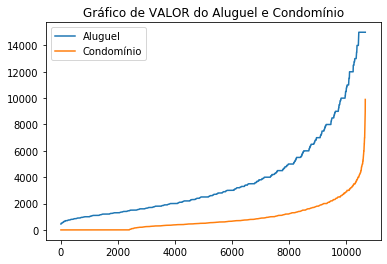

In [73]:
# Gráfico de linha do "Valor do Aluguel" e "Valor do Condomínio"

# IMPORTANTE - ADICIONAR TERCEIRA LINHA QUE APRESENTA A RELAÇÃO DE 28% ENTRE CONDOMÍNIO E ALUGUEL

df.aluguel.sort_values().reset_index(drop=True).plot(label='Aluguel')
df.condominio.sort_values().reset_index(drop=True).plot(label='Condomínio')
plt.title('Gráfico de VALOR do Aluguel e Condomínio')
plt.legend()

[]

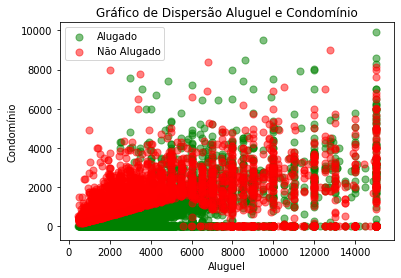

In [74]:
# Gráfico de Dispersão Aluguel e Condomínio

ax = df[df.alugado==1].plot.scatter(x='aluguel', y='condominio', s = 50, color='green', label='Alugado', alpha =0.5);
df[df.alugado==0].plot.scatter(x='aluguel', y='condominio', s = 50,color='red', label='Não Alugado', ax=ax, alpha =0.5);
plt.title('Gráfico de Dispersão Aluguel e Condomínio')
plt.ylabel('Condomínio')
plt.xlabel('Aluguel')
plt.plot()

Text(0.5, 6.79999999999999, 'Aluguel')

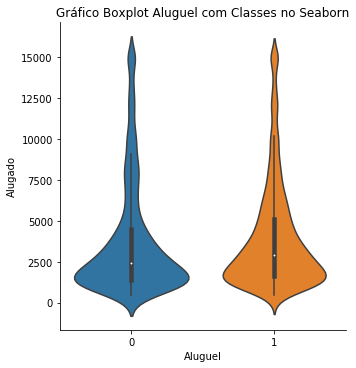

In [75]:
# Gráfico Boxplot aluguel com Classes no Seaborn
# 0 = Não Alugado
# 1 = Alugado

sns.catplot(x="alugado", y="aluguel", kind="violin", data=df);
plt.title('Gráfico Boxplot Aluguel com Classes no Seaborn')
plt.ylabel('Alugado')
plt.xlabel('Aluguel')

In [76]:
# Separando dados de treino e teste

X = df[['vagas','area']].values
y = df['alugado'].values

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=10)

In [78]:
# árvores de decisão
clf = tree.DecisionTreeClassifier(max_depth=3)

In [79]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [80]:
# predição testando aluguel x condomínio
clf.predict([[2500, 1000]])

array([1])

In [81]:
y_pred = clf.predict(X_test)

In [82]:
clf.score(X_test, y_test)

0.5754805438349743

In [86]:
# matriz de confusão (decision tree)
confusion_matrix(y_test,y_pred)

array([[ 882,  978],
       [ 833, 1573]])

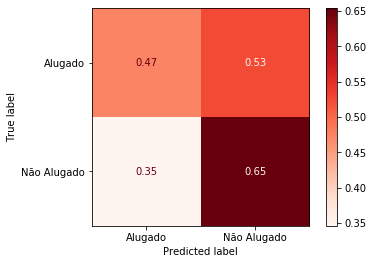

In [84]:
plot_confusion_matrix(clf, X_test,y_test, cmap=plt.cm.Reds,normalize='true', display_labels=['Alugado','Não Alugado'])

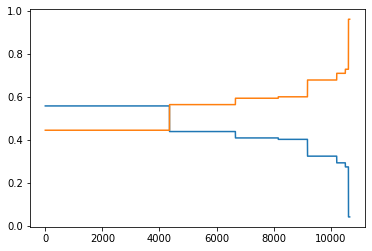

In [87]:
arr = clf.predict_proba(X)
P = arr[arr[:, 1].argsort()]
plt.plot(P[:,0])
plt.plot(P[:,1])

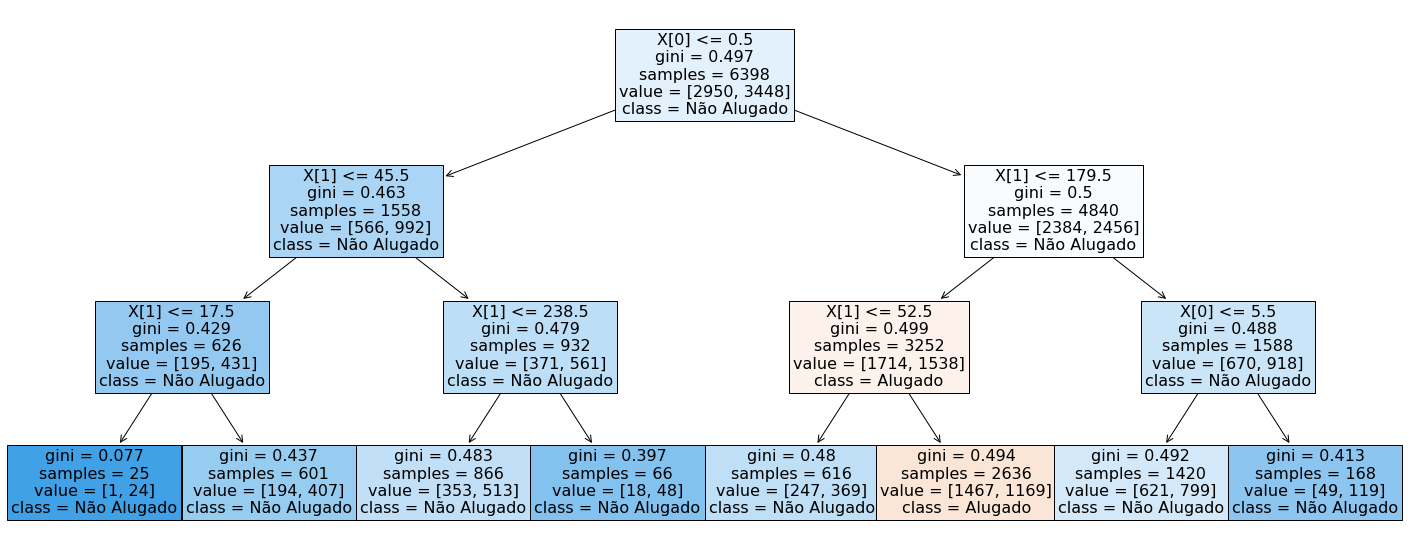

In [88]:
plt.figure(figsize=(25,10))
tree.plot_tree(clf, fontsize=16, filled=True, class_names=['Alugado','Não Alugado']);

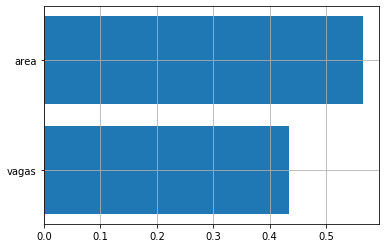

In [89]:
# atributos informativos
plt.barh(y = [0,1],width=clf.feature_importances_,tick_label=['vagas','area'])
plt.grid()

In [90]:
# função grafico_classificador
def grafico_classificador(X, y, test_size, modelo, nome_modelo, nome_dataset, pca=False, norm=True):
    cmap = 'bwr'
    fig, ax = plt.subplots(2, 3, figsize=(15,10))
    suptitle = nome_modelo
    if pca==True:
        pca=PCA(n_components=2)
        pca.fit(X)
        X = pca.transform(X)
    if norm==True:
        X = StandardScaler().fit_transform(X)
        suptitle = nome_modelo+ ' Dados Normalizados'
    fig.suptitle(suptitle, fontsize=16)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    clf = modelo
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    h = .02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    # Plotagem do dataset
    ax[0,0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap,edgecolors='w', s=10)
    ax[0,0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap, alpha=0.6,edgecolors='w',s=10)
    ax[0,0].set_title(nome_dataset)
    ax[0,0].set_xlabel('X1')
    ax[0,0].set_ylabel('X2')
    ax[0,1].contourf(xx, yy, Z, cmap=cmap, alpha=.8)
    ax[0,1].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap,edgecolors='w',s=10)
    ax[0,1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap, alpha=0.6,edgecolors='w',s=10)
    ax[0,1].set_title(nome_modelo+' score='+str(score))
    ax[0,1].set_xlabel('X1')
    ax[0,1].set_ylabel('X2')
    y_pred = clf.fit(X_train,y_train).predict(X_test)
    arr = clf.predict_proba(X)
    P = arr[arr[:, 1].argsort()]
    fpr, tpr, tres = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
    aucc = auc(fpr,tpr)
    ax[0,2].matshow(confusion_matrix(y_test,y_pred),cmap='bwr')
    ax[0,2].set_title('Matriz de Confusão')
    ax[0,2].text(0, 0, confusion_matrix(y_test,y_pred)[0,0],color='w', fontsize=16, horizontalalignment='center')
    ax[0,2].text(0, 1, confusion_matrix(y_test,y_pred)[0,1],color='w', fontsize=16, horizontalalignment='center')
    ax[0,2].text(1, 0, confusion_matrix(y_test,y_pred)[1,0],color='w', fontsize=16, horizontalalignment='center')
    ax[0,2].text(1, 1, confusion_matrix(y_test,y_pred)[1,1],color='w', fontsize=16, horizontalalignment='center')
    ax[0,2].set_xticklabels(['','prev positivo','prev negativo'])
    ax[0,2].set_yticklabels(['','real positivo','real negativo'], rotation=90, va="center")
    ax[1,0].plot(P[:,0],'b-')
    ax[1,0].plot(P[:,1],'r-')
    ax[1,0].set_title(nome_modelo+' Curvas Prob.')
    ax[1,0].set_ylabel('Prob')
    ax[1,1].contourf(xx, yy, Z, cmap=cmap, alpha=.8)
    ax[1,1].set_title(nome_modelo+' Superf. Dec.')
    ax[1,1].set_xlabel('X1')
    ax[1,1].set_ylabel('X2')
    ax[1,2].plot(fpr,tpr,'r-')
    ax[1,2].plot([0,1],[0,1],'b:')
    ax[1,2].set_title('Curva ROC AUC= '+str(np.round(aucc,3)))
    ax[1,2].set_xlabel('TFP')
    ax[1,2].set_ylabel('TVP')
    fig.tight_layout(pad=3.5)
    return

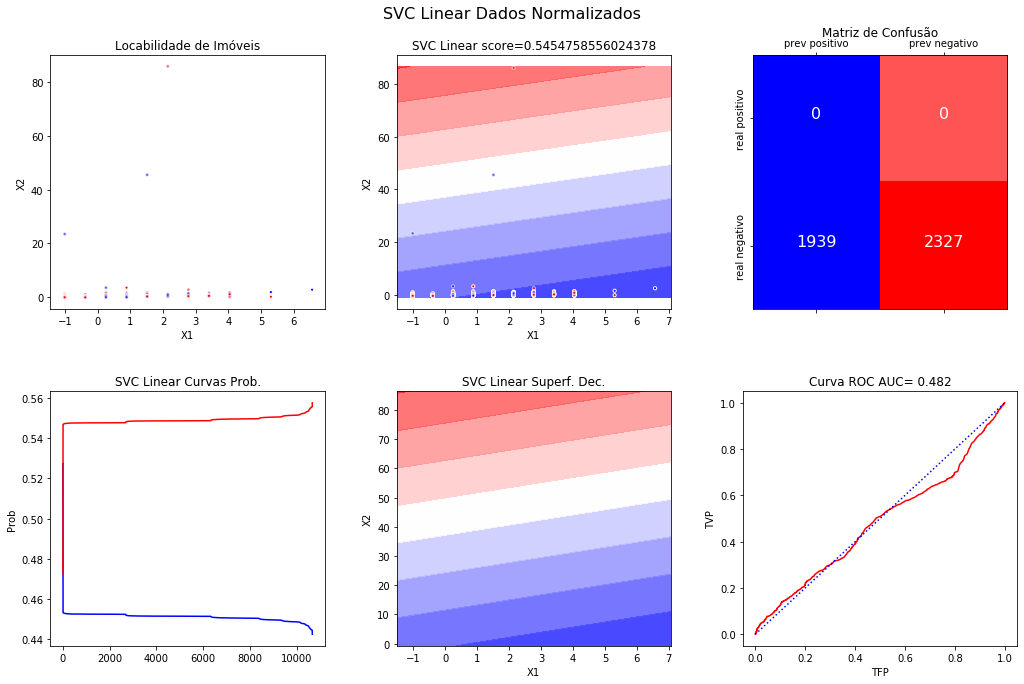

In [92]:
grafico_classificador(X, y, test_size=0.4, modelo=SVC(kernel="linear", C=0.025, probability=True), 
                      nome_modelo='SVC Linear', nome_dataset='Locabilidade de Imóveis', pca=False, norm=True)

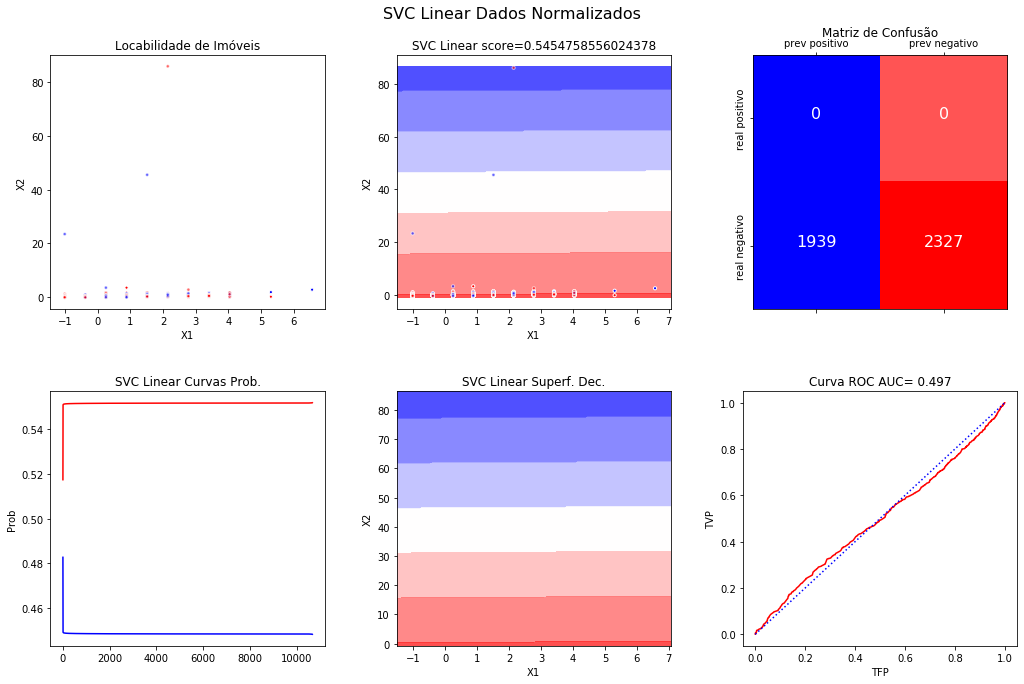

In [93]:
grafico_classificador(X, y, test_size=0.4, modelo=SVC(kernel="linear", C=0.1, probability=True), 
                      nome_modelo='SVC Linear', nome_dataset='Locabilidade de Imóveis', pca=False, norm=True)

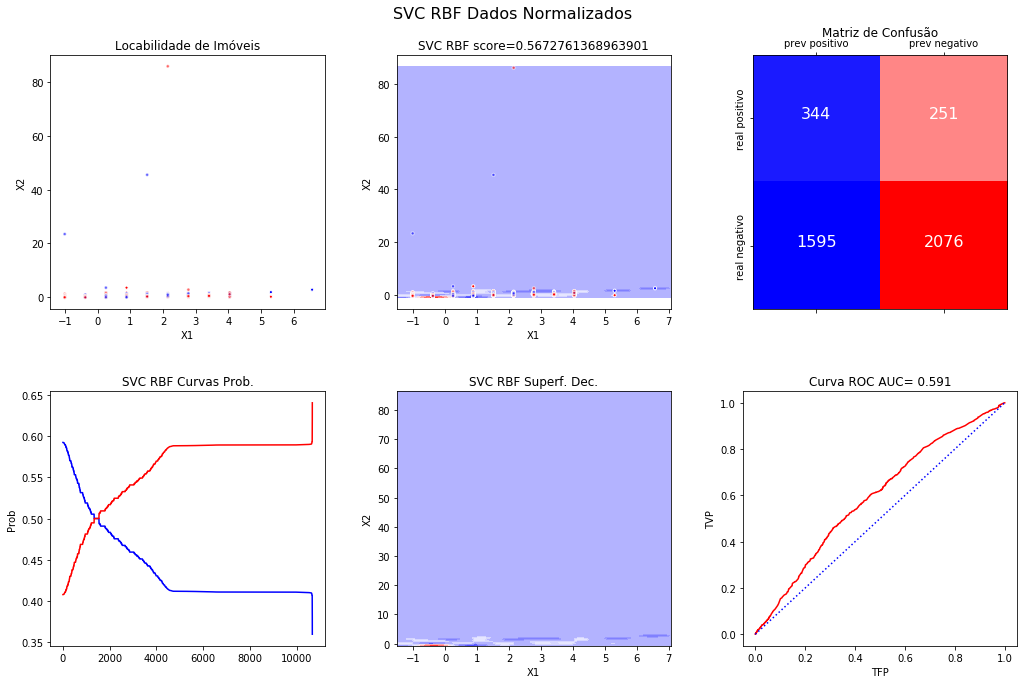

In [94]:
grafico_classificador(X, y, test_size=0.4, modelo=SVC(kernel="rbf",gamma=2.0, C=1.0, probability=True), 
                      nome_modelo='SVC RBF', nome_dataset='Locabilidade de Imóveis', pca=False, norm=True)

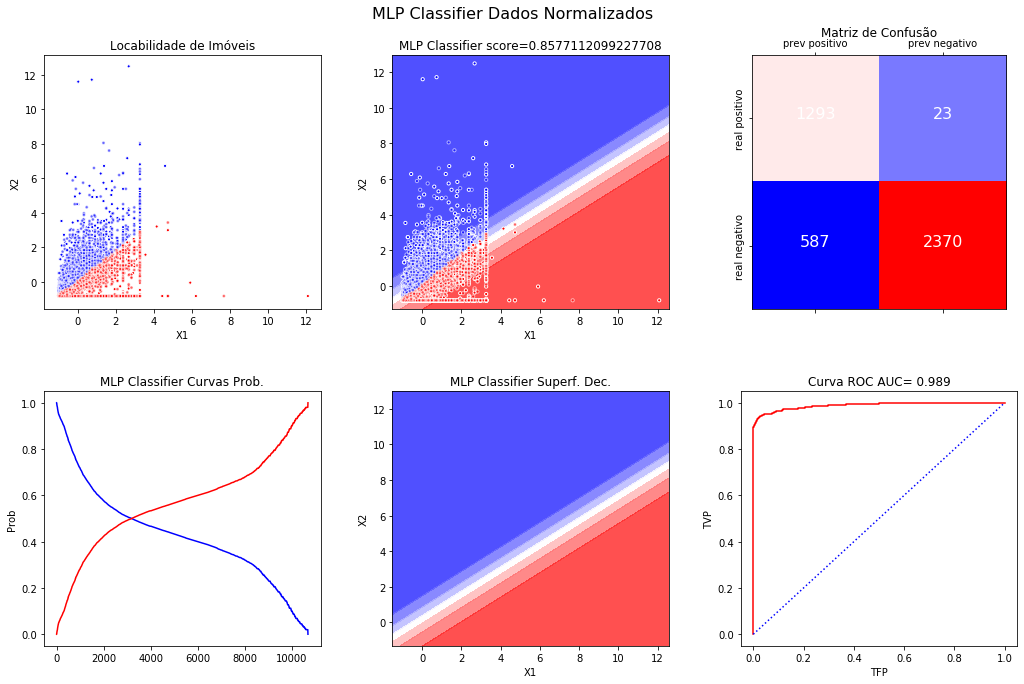

In [78]:
grafico_classificador(X, y, test_size=0.4, modelo=MLPClassifier(alpha=10, max_iter=1000), 
                      nome_modelo='MLP Classifier', nome_dataset='Locabilidade de Imóveis', pca=False, norm=True)

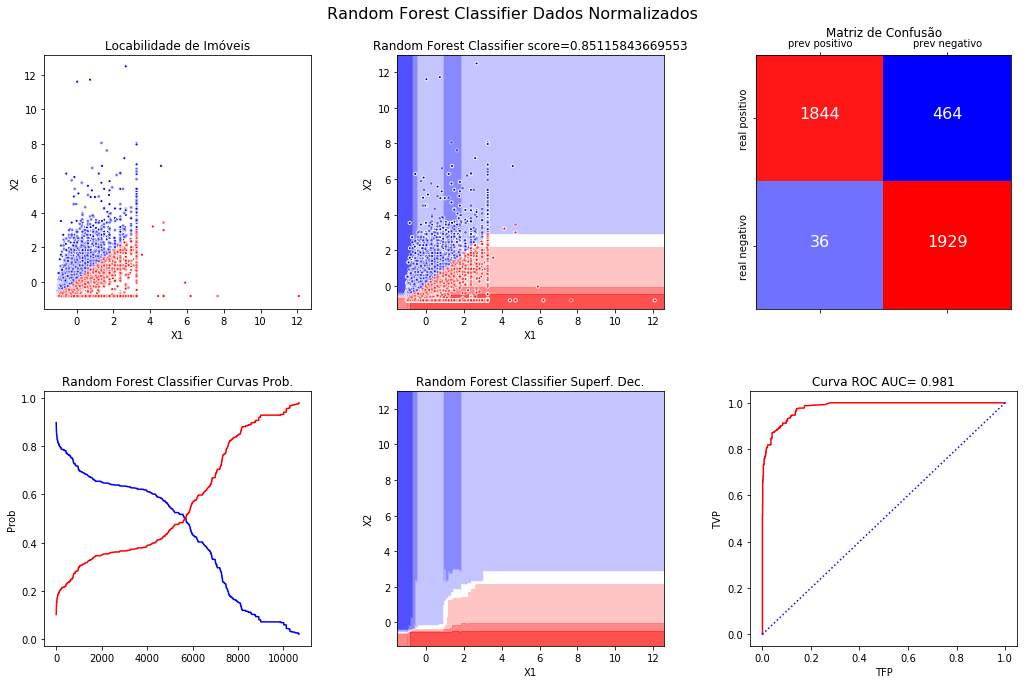

In [82]:
grafico_classificador(X, y, test_size=0.4, modelo=RandomForestClassifier(n_estimators=50, max_depth=3), 
                      nome_modelo='Random Forest Classifier', nome_dataset='Locabilidade de Imóveis', 
                      pca=False, norm=True)

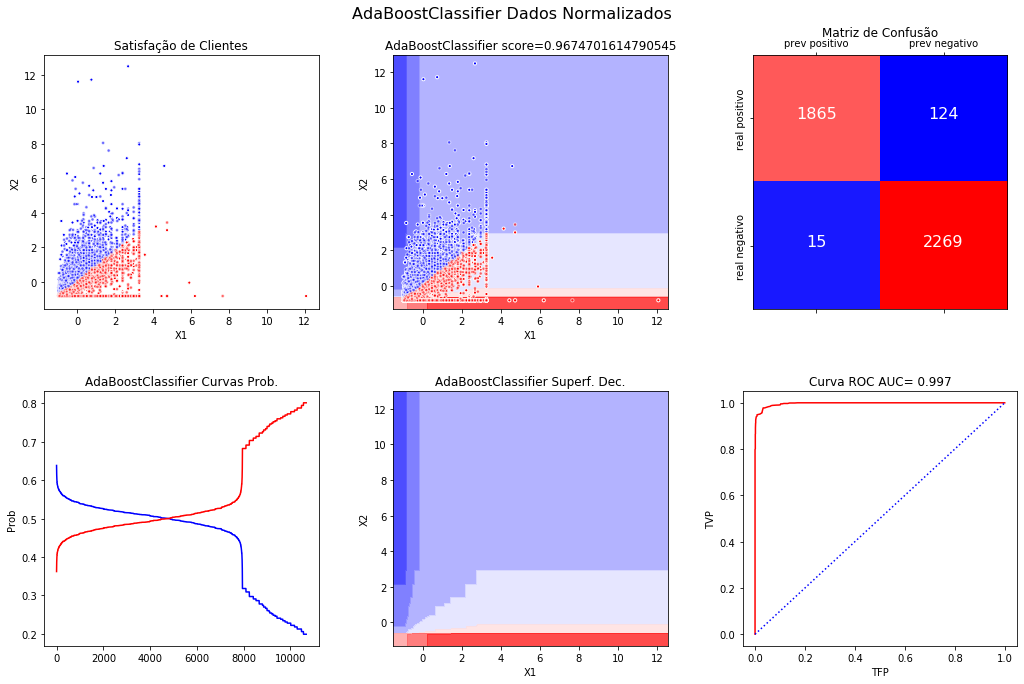

In [83]:
grafico_classificador(X, y, test_size=0.4, modelo=AdaBoostClassifier(n_estimators=50), 
                      nome_modelo='AdaBoostClassifier', nome_dataset='Locabilidade de Imóveis', 
                      pca=False, norm=True)

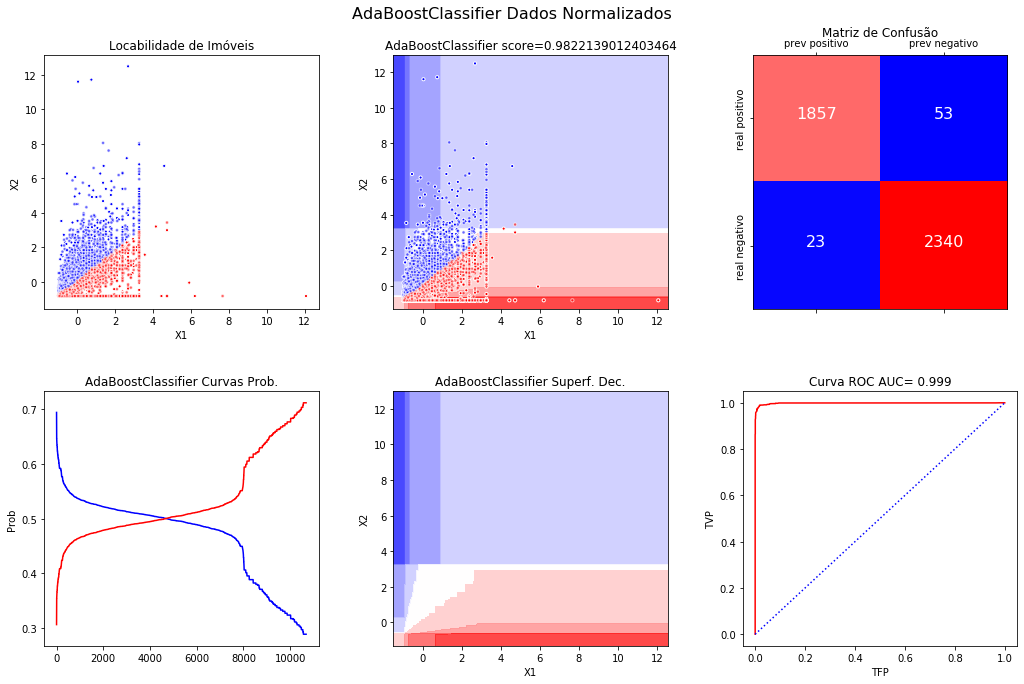

In [84]:
grafico_classificador(X, y, test_size=0.4, modelo=AdaBoostClassifier(n_estimators=100), 
                      nome_modelo='AdaBoostClassifier', nome_dataset='Locabilidade de Imóveis', 
                      pca=False, norm=True)

In [86]:
# Vamos instalar outras bibliotecas pelo Juoyter
import sys
!{sys.executable} -m pip install xgboost
!{sys.executable} -m pip install catboost

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=1d2b66103df4a1364dd102879a90fb702335d30b1719815a720579fd57f1862a
  Stored in directory: c:\users\oliva\appdata\local\pip\cache\wheels\f9\8d\8d\f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [87]:
from xgboost import XGBClassifier

MemoryError: Unable to allocate 12.2 TiB for an array with shape (750050, 2227550) and data type float64

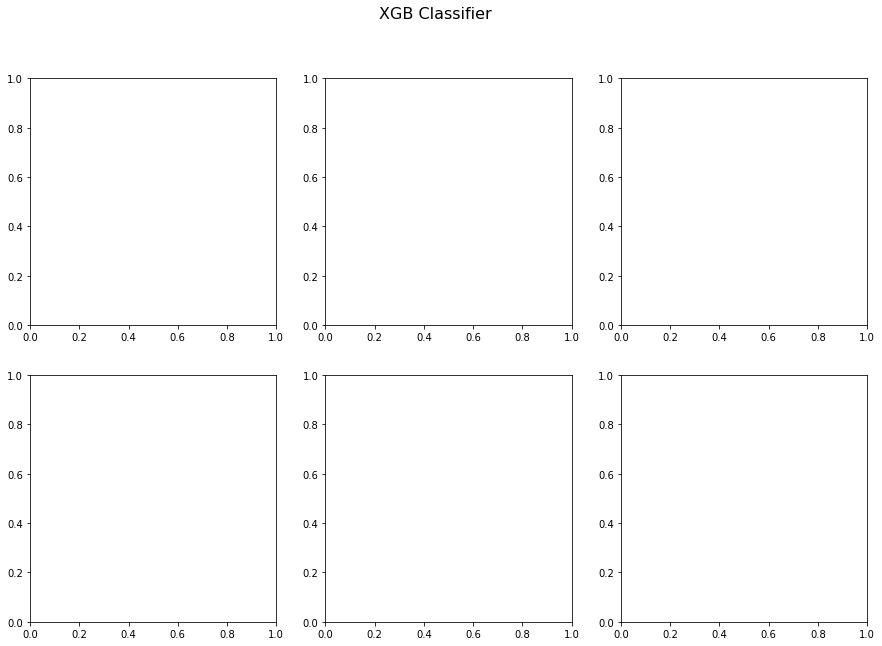

In [88]:
grafico_classificador(X, y, test_size=0.4, modelo=XGBClassifier(n_estimators=100, max_depth=5, random_state=42), 
                      nome_modelo='XGB Classifier', nome_dataset='Locabilidade de Imóveis', 
                      pca=False, norm=False)

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
grafico_classificador(X, y, test_size=0.4, modelo=CatBoostClassifier(iterations=2,
                                                                     depth=3,learning_rate=0.5,loss_function='Logloss'), 
                      nome_modelo='CatBoost Classifier', nome_dataset='Locabilidade de Imóveis', 
                      pca=False, norm=False)